The dataset of nki breast cancer gene array is available from BioConductor 

In [1]:
source("http://bioconductor.org/biocLite.R")
biocLite("breastCancerNKI")
biocLite("genefu")
library(genefu)
library(breastCancerNKI)
library(Biobase)

library(ggplot2)

Bioconductor version 3.2 (BiocInstaller 1.20.1), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.1), R 3.2.3 (2015-12-10).
Installing package(s) ‘breastCancerNKI’
installing the source package ‘breastCancerNKI’




The downloaded source packages are in
	‘/private/var/folders/8_/1kwytmf91cg28trbksr84lhr0000gn/T/Rtmp94brkr/downloaded_packages’


Old packages: 'curl', 'devtools', 'lava', 'plotly', 'vegan'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.2 (BiocInstaller 1.20.1), R 3.2.3 (2015-12-10).
Installing package(s) ‘genefu’



The downloaded binary packages are in
	/var/folders/8_/1kwytmf91cg28trbksr84lhr0000gn/T//Rtmp94brkr/downloaded_packages


Old packages: 'curl', 'devtools', 'lava', 'plotly', 'vegan'
Loading required package: survcomp
Loading required package: survival
Loading required package: prodlim
Loading required package: mclust
Warning message:
: package ‘mclust’ was built under R version 3.2.4Package 'mclust' version 5.2
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: biomaRt
Loading required package: iC10
Loading required package: pamr
Loading required package: cluster
Loading required package: iC10TrainingData
Loading required package: AIMS
Loading required package: e1071
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects a

In [2]:
data(sig.oncotypedx)
data(nkis)
data(nki)
nki.data = exprs(nki)
nki.clinical=data.frame(pData(nki))

In [3]:
head(nki.data)

,NKI_4,NKI_6,NKI_7,NKI_8,NKI_9,NKI_11,NKI_12,NKI_13,NKI_14,NKI_17,,NKI_393,NKI_394,NKI_395,NKI_396,NKI_397,NKI_398,NKI_401,NKI_402,NKI_403,NKI_404
Contig45645_RC,-0.215,0.071,0.182,-0.343,-0.134,-0.107,-1.657,0.365,0.046,0.719,⋯,-0.144,-0.004,-0.075,-0.067,-0.023,0.079,0.353,-2,0.303,-0.67
Contig44916_RC,-0.207,0.055,0.077,0.302,0.051,0.025,-0.376,0.349,0.156,-0.187,⋯,-0.1,-0.152,-0.022,-0.119,-0.016,0.146,0.454,-0.118,0.211,-0.292
D25272,-0.158,-0.01,0.059,0.169,-0.007,0.008,-0.349,0.312,0.045,-0.759,⋯,-0.026,-0.118,0.058,-0.097,-0.006,0.234,0.529,-0.188,0.327,-0.161
J00129,-0.819,-0.391,-0.624,-0.528,-0.811,-0.42,-0.686,-0.299,-0.416,-0.721,⋯,-0.167,-0.695,0.148,0.086,-0.202,0.16,0.262,-0.522,-0.014,-0.726
Contig29982_RC,-0.267,-0.31,-0.12,-0.447,-0.536,-0.286,-0.333,-0.137,-0.633,-0.527,⋯,-0.06,-0.294,-0.002,-0.15,-0.241,0.229,0.4,-0.281,0.242,0.156
Contig26811,0.229,0.157,0.12,0.283,-0.112,0.152,0.697,0.408,-0.169,-0.13,⋯,0.295,0.08,NaN,0.142,0.151,0.379,0.746,-0.029,0.544,0.255


The dataset nki.data contains gene expression data, with expression profiling for ~25,000 genes from 337 patients. This is typical of gene expression data, with a lot more features than samples. Talk about curse of dimensionality. 

The second dataset is nki.clinical, with 21 clinical features of 337 patients. Features include tumor size, tumor grade, er (estrogen receptor) positive or negative, spread to lymph node or not. 

In [4]:
head(nki.clinical)

,samplename,dataset,series,id,filename,size,age,er,grade,pgr,ellip.h,brca.mutation,e.dmfs,t.dmfs,node,t.rfs,e.rfs,treatment,tissue,t.os,e.os
NKI_4,NKI_4,NKI,NKI,4,NA,2,41,1,3,NA,⋯,0,0,4747,0,4747,0,0,1,4744,0
NKI_6,NKI_6,NKI,NKI,6,NA,1.3,49,1,2,NA,⋯,0,0,4075,0,4075,0,0,1,4072,0
NKI_7,NKI_7,NKI,NKI,7,NA,2,46,0,1,NA,⋯,0,0,3703,0,3703,0,0,1,3700,0
NKI_8,NKI_8,NKI,NKI,8,NA,2.8,48,0,3,NA,⋯,0,0,3215,0,3215,0,0,1,3213,0
NKI_9,NKI_9,NKI,NKI,9,NA,1.5,48,1,3,NA,⋯,0,0,3760,0,3760,0,0,1,3757,0
NKI_11,NKI_11,NKI,NKI,11,NA,2.2,37,1,3,NA,⋯,0,0,2120,0,2120,0,0,1,2119,0


There are several outcome variables in nki.clinical. 'dmfs' stands for distant metastasis free survival. 'rfs' stands for remission-free survial, and 'os' for overall survival. 't' for number of days, as continuous variable, and 'e' for events, as binary variable. These patients have been followed up for at least five years. After reading the original paper and other literature, e.dmfs is selected as target variable.

# Estrogen-receptor-positive breast cancer

About 80% of all breast cancer are estrogen-receptor-positive. Tumors that are ER-positive are more likely to respond to hormone therapy and generally have better surival rates than ER-engative tumors. This dataset showed the same trend. ER-positive patients have significantly better outcomes, as shown by ttest and density plot

In [5]:
nki.clinical$er = as.factor(nki.clinical$er)
t.test(t.dmfs~er, data=nki.clinical)


	Welch Two Sample t-test

data:  t.dmfs by er
t = -3.5467, df = 118.15, p-value = 0.0005602
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1113.2280  -315.5176
sample estimates:
mean in group 0 mean in group 1 
       1997.203        2711.576 


Warning message:
: Removed 18 rows containing non-finite values (stat_density).

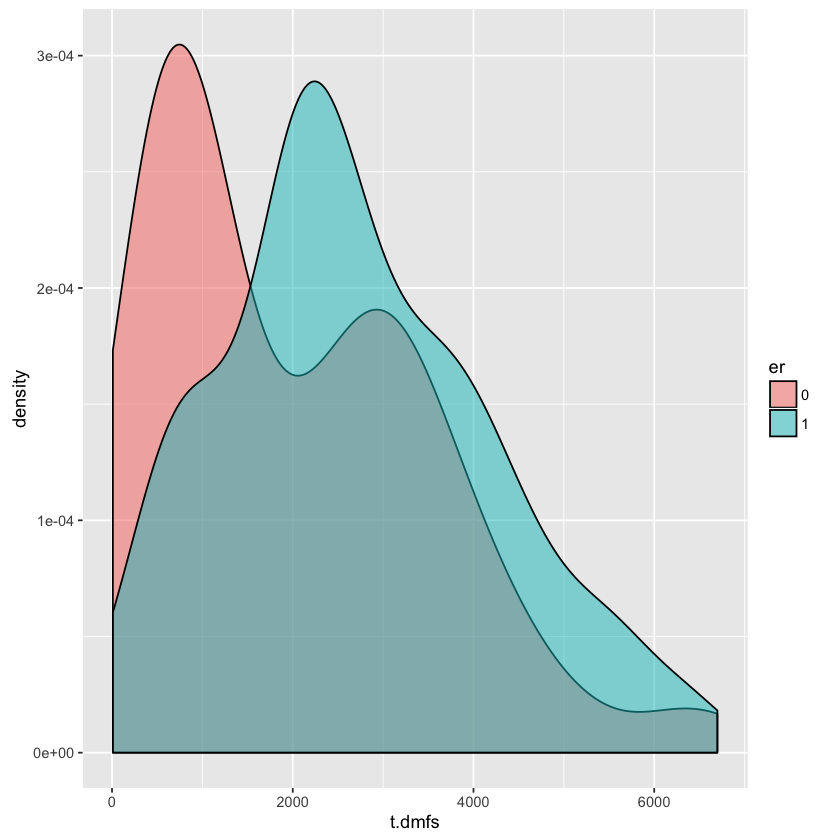

In [6]:
ggplot(nki.clinical,aes(x=t.dmfs,fill=er))+geom_density(alpha=0.5)

# BRCA mutations

BRCA1 and BRCA2 are the best-known genes linked to breast cancer risk, and receive a lot of press coverage lately. Among 337 patients, 117 were screened for BRCA mutations. 97 had no BRCA mutations, 18 had BRCA1 mutation and 2 had BRCA2 mutation. Breast cancer linked with BRCA mutations are generally estrogen-receptor-negative and have less treatment options. Plotting of five-year dmfs showed most patients with BRCA mutations didn't survive past five years.

In [9]:
nki.clinical$brca.mutation=as.factor(nki.clinical$brca.mutation)
table(nki.clinical$brca.mutation)


 0  1  2 
97 18  2 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 18 rows containing non-finite values (stat_bin).

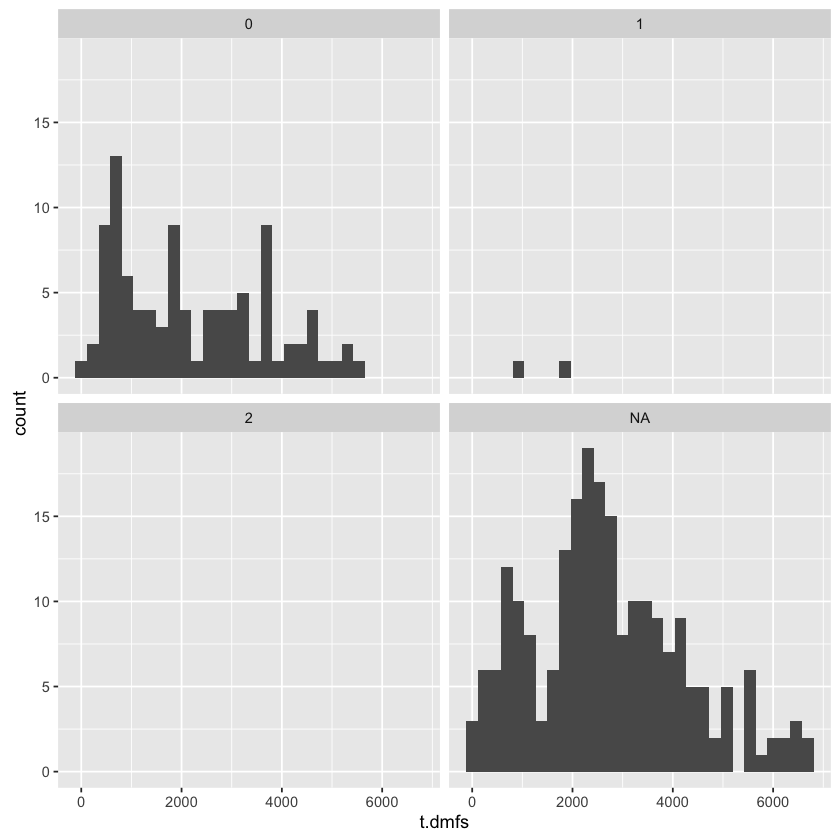

In [10]:
ggplot(nki.clinical,aes(x=t.dmfs))+geom_histogram()+facet_wrap(~brca.mutation)

# Lymph node status

Lymph node status is considered an important indicator of cancer status and survial. Survival of patients with negative lymph nodes is genereally better than those with positive lymph nodes. But in this study, t.dfms showed no significant difference between node-positive and node-negative patients. Gene expression signature, as discussed below, is a better indicator of cancer status and survival.

In [11]:
nki.clinical$node=as.factor(nki.clinical$node)
t.test(t.dmfs~node,data=nki.clinical)


	Welch Two Sample t-test

data:  t.dmfs by node
t = -0.42231, df = 311.31, p-value = 0.6731
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -408.6473  264.2286
sample estimates:
mean in group 0 mean in group 1 
       2513.263        2585.472 


Warning message:
: Removed 18 rows containing non-finite values (stat_density).

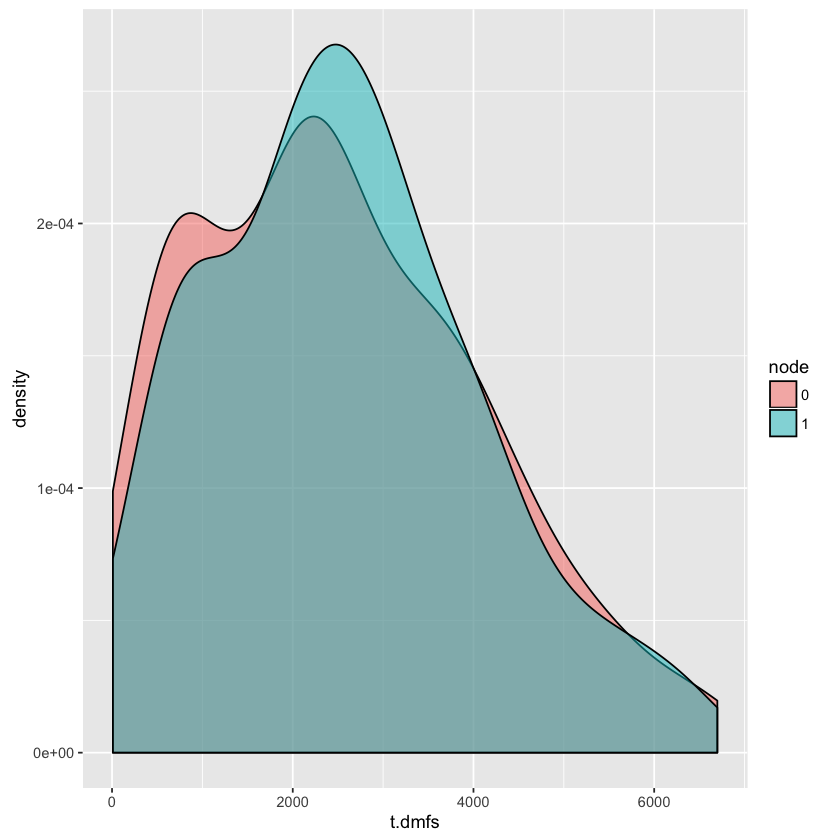

In [12]:
ggplot(nki.clinical,aes(x=t.dmfs,fill=node))+geom_density(alpha=0.5)

# Tumor grade

Tumor grade is an important indicator of cancer survial. This dataset confirmed that tumor grade is a significant predictor of survival, as shown by anova test. Density plot showed a significant left shift for grade 3 tumor. Grade 2 is less affected.

In [13]:
nki.clinical$grade = as.factor(nki.clinical$grade)
model.lm = lm(t.dmfs~grade,data=nki.clinical)
anova(model.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grade,2,26584290,13292145,5.877163,0.003118219
Residuals,316,714684554,2261660,NA,NA


Warning message:
: Removed 18 rows containing non-finite values (stat_density).

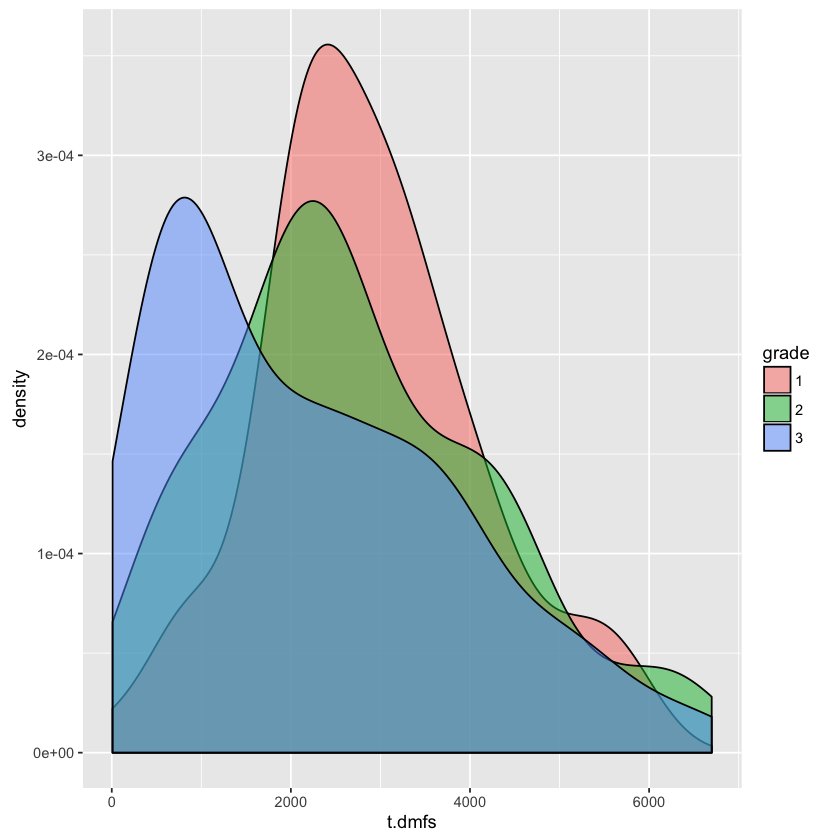

In [14]:
ggplot(nki.clinical,aes(x=t.dmfs,fill=grade))+geom_density(alpha=0.5)

# Gene 70 signature

Through supervised classification and leave-one-out sequential forward selection, van 't Veer et al. identified the 70-gene signature and acheivied >90% sensitivity with this signature. I used sig.gene70 for feature selection.

In [15]:
data(sig.gene70)
nki.gene70 = nki.data[sig.gene70$probe,]

In [16]:
head(nki.gene70)

,NKI_4,NKI_6,NKI_7,NKI_8,NKI_9,NKI_11,NKI_12,NKI_13,NKI_14,NKI_17,,NKI_393,NKI_394,NKI_395,NKI_396,NKI_397,NKI_398,NKI_401,NKI_402,NKI_403,NKI_404
NM_003748,0.231,0.159,0.047,-0.123,0.072,0.011,0.074,0.324,0.126,0.126,⋯,0.138,-0.105,0.026,0.369,-0.2,-0.156,0.158,-0.009,-0.175,-0.326
NM_003862,-0.033,0.219,0.77,-0.418,0.186,0.336,-0.439,-0.095,0.226,0.568,⋯,-0.066,-0.134,0.082,-0.565,0.32,-0.561,-0.521,-0.306,0.107,-0.001
Contig32125_RC,0.109,0.352,0.183,-0.082,0.047,-0.024,NaN,0.376,-0.032,0.312,⋯,-0.141,0.193,0.018,-0.142,-0.059,-0.252,0.109,-0.064,-0.006,0.016
U82987,0.125,0.394,0.007,0.139,0.278,-0.026,-0.235,0.179,NaN,0.235,⋯,0.081,0.164,0.164,0.112,0.111,-0.184,-0.026,-0.105,0.114,0.175
AB037863,0.456,0.319,0.323,-0.253,0.294,-0.303,-0.211,0.121,-0.069,0.433,⋯,0.017,0.319,-0.048,-0.39,-0.126,-0.171,0.179,-0.297,-0.081,0.116
NM_020974,-0.628,0.703,-0.218,-0.098,0.711,-0.424,-1.18,0.075,0.881,0.301,⋯,-0.66,0.07,0.091,-1.201,0.044,-0.934,0.963,-0.846,0.464,0.892


In [16]:
#transpose the matrix and remove NA
nki.gene70 = t(nki.gene70)
nki.X1 = nki.gene70[complete.cases(nki.gene70),]
nki.Y1 = nki.clinical[complete.cases(nki.gene70),]
nki.X2 = nki.X1[complete.cases(nki.Y1$e.dmfs),]
nki.Y2 = nki.Y1[complete.cases(nki.Y1$e.dmfs),]

In [17]:
y = as.factor(nki.Y2$e.dmfs)
X = data.frame(nki.X2,y)

In [18]:
head(X)

,NM_003748,NM_003862,Contig32125_RC,U82987,AB037863,NM_020974,Contig55377_RC,NM_003882,NM_000849,Contig48328_RC,ellip.h,NM_020188,AL137718,Contig28552_RC,Contig38288_RC,AA555029_RC,NM_016359,Contig46218_RC,Contig63649_RC,AL080059,y
NKI_4,0.231,-0.033,0.109,0.125,0.456,-0.628,0.024,-0.276,-0.233,0.426,⋯,0.314,-0.038,-0.036,-0.037,-0.143,-0.01,-0.059,-0.077,0.235,0
NKI_6,0.159,0.219,0.352,0.394,0.319,0.703,0.174,0.134,0.468,0.775,⋯,-0.279,-0.194,-0.365,0.078,-0.269,-0.349,-0.326,-0.147,-0.702,0
NKI_7,0.047,0.77,0.183,0.007,0.323,-0.218,0.071,0.377,0.289,-0.243,⋯,-0.349,-0.134,-0.319,-0.092,-0.148,-0.452,-0.295,-0.27,-0.332,0
NKI_8,-0.123,-0.418,-0.082,0.139,-0.253,-0.098,-0.143,-0.163,-0.383,-0.32,⋯,0.094,0.008,0.12,0.131,-0.14,0.006,-0.017,0.138,-0.234,0
NKI_9,0.072,0.186,0.047,0.278,0.294,0.711,-0.168,0.195,0.501,0.322,⋯,-0.127,0.012,-0.042,-0.133,-0.18,-0.209,-0.118,0.12,-0.553,0
NKI_11,0.011,0.336,-0.024,-0.026,-0.303,-0.424,-0.084,0.055,0.202,-0.541,⋯,0.125,-0.006,-0.047,-0.145,0.034,0.021,-0.065,-0.358,-0.351,0


# Model with random forest

In [19]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:Biobase’:

    combine

The following object is masked from ‘package:BiocGenerics’:

    combine



In [20]:
train = sample (1: nrow(X), nrow(X)/2)

In [21]:
rf.nki = randomForest(y~.,data=X,subset=train,mtyr=9)

In [22]:
rf.pred = predict(rf.nki, newdata=X[-train,])

In [23]:
table(rf.pred,y[-train])

       
rf.pred  0  1
      0 78 24
      1 28 20

In [24]:
mean(rf.pred==y[-train])

[1] 0.6533333

Sesitivity/recall:  20/(20+24) = 0.45

# Model with SVM

In [25]:
library(e1071)

### cross-validation with linear, polynomial, and gaussian kernel

In [26]:
tune1=tune(svm,y~.,data=X,kernel='linear',ranges=list(cost=c(0.0001,0.001,0.01,0.1,1,10)))
summary(tune1)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.3133333 

- Detailed performance results:
   cost     error dispersion
1 1e-04 0.3400000 0.06440612
2 1e-03 0.3400000 0.06440612
3 1e-02 0.3133333 0.09454243
4 1e-01 0.3133333 0.09711899
5 1e+00 0.3266667 0.08285045
6 1e+01 0.3566667 0.11227172


In [27]:
tune2=tune(svm,y~.,data=X,kernel='polynomial',ranges=list(degree=c(1,2,3),cost=c(0.01,0.1,1)))
summary(tune2)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 degree cost
      1    1

- best performance: 0.3 

- Detailed performance results:
  degree cost     error dispersion
1      1 0.01 0.3400000 0.10634210
2      2 0.01 0.3400000 0.10634210
3      3 0.01 0.3400000 0.10634210
4      1 0.10 0.3400000 0.10634210
5      2 0.10 0.3400000 0.10634210
6      3 0.10 0.3433333 0.10189561
7      1 1.00 0.3000000 0.05665577
8      2 1.00 0.3333333 0.08461970
9      3 1.00 0.3333333 0.10772622


In [28]:
tune3 = tune(svm,y~.,data=X,kernel='radial',ranges=list(cost=c(0.01,0.1,1,10,100),gamma=c(0.5,1,2,3,4)))
summary(tune3)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
 0.01   0.5

- best performance: 0.34 

- Detailed performance results:
    cost gamma error dispersion
1  1e-02   0.5  0.34 0.09532271
2  1e-01   0.5  0.34 0.09532271
3  1e+00   0.5  0.34 0.09532271
4  1e+01   0.5  0.34 0.09532271
5  1e+02   0.5  0.34 0.09532271
6  1e-02   1.0  0.34 0.09532271
7  1e-01   1.0  0.34 0.09532271
8  1e+00   1.0  0.34 0.09532271
9  1e+01   1.0  0.34 0.09532271
10 1e+02   1.0  0.34 0.09532271
11 1e-02   2.0  0.34 0.09532271
12 1e-01   2.0  0.34 0.09532271
13 1e+00   2.0  0.34 0.09532271
14 1e+01   2.0  0.34 0.09532271
15 1e+02   2.0  0.34 0.09532271
16 1e-02   3.0  0.34 0.09532271
17 1e-01   3.0  0.34 0.09532271
18 1e+00   3.0  0.34 0.09532271
19 1e+01   3.0  0.34 0.09532271
20 1e+02   3.0  0.34 0.09532271
21 1e-02   4.0  0.34 0.09532271
22 1e-01   4.0  0.34 0.09532271
23 1e+00   4.0  0.34 0.09532271
24 1e+01   4.0  0.34 0.09532271
25 1e+02   4.0  0.34 0

### Choose linear kernel with c=0.1

In [29]:
svm1 = svm(y~.,data=X[train,],kernel='linear',cost=0.01)
svm1.pred = predict(svm1, newdata=X[-train,])
table(svm1.pred,y[-train])

         
svm1.pred  0  1
        0 76 23
        1 30 21

In [30]:
mean(svm1.pred==y[-train])

[1] 0.6466667

Sensitivity/reacall:  21/(21+23)=0.48

In [31]:
svm2 = svm(y~.,data=X[train,],kernel='linear',cost=0.1)
svm2.pred = predict(svm2, newdata=X[-train,])
table(svm2.pred,y[-train])

         
svm2.pred  0  1
        0 66 18
        1 40 26

In [32]:
mean(svm2.pred==y[-train])

[1] 0.6133333

Sensitivity/recall:  26/(26+18)= 0.59

### Plot ROC curve

In [33]:
library(ROCR)

Loading required package: gplots
Warning message:
: package ‘gplots’ was built under R version 3.2.4
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [34]:
svm.nki =svm(y~.,data=X,kernel='linear',cost=0.1,probability=TRUE)
pred.svm =predict(svm.nki,X,probability=TRUE)
pred.svm.roc=prediction(attr(pred.svm,'probabilities')[,2],y)
perf.svm=performance(pred.svm.roc,'tpr','fpr')

rf.nki =randomForest(y~.,data=X,mtyr=9)
pred.rf.roc=prediction(as.vector(rf.nki$votes[,2]),y)
perf.rf=performance(pred.rf.roc,'tpr','fpr')

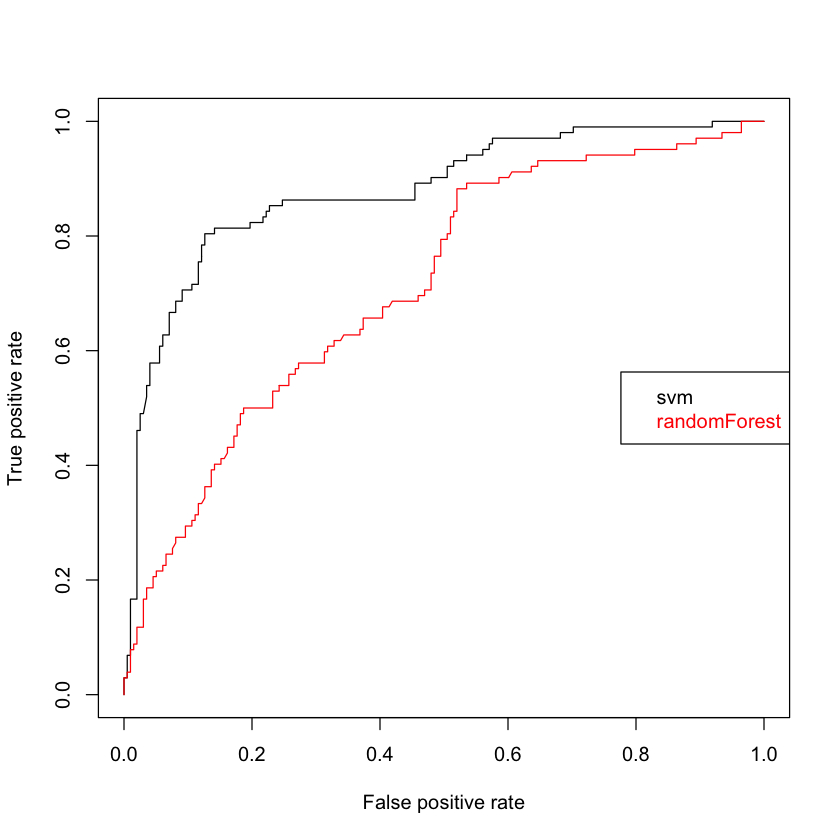

In [35]:
plot(perf.svm,col=1)
plot(perf.rf,add=TRUE,col=2)
legend('right',c('svm','randomForest'),text.col=c(1,2))